# ***DATASET, HUST bearing: a practical dataset for ball bearing fault diagnosis***
Se seleccionaron los datos de rulemanes con **ID 6207** de las siguientes características:

Diametro interno: 35 mm.

Diametro externo: 72 mm.

Diametro de bola: 11,0 mm.

Número de bola: 9

Al contar el DataSet con una gran cantidad de datos para distintos tipos de rulemanes y fallas, en este trabajo se utilizarán los datos B700,I700,IB700,IO700,N700.
Las referencias en los códigos son:

**B**700: La B hace referencia a condición de falla en elemento de rodadura.

B**7**00: El 7 hace referencia a rulemanes con ID 620**7**

B70**0**: El 0 hace referencia a condición de carga de 0 W.

Y análogamente para los demás tipos de condiciones.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from pylab import rcParams
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta1='/content/drive/MyDrive/TP_IA/B700.mat'
ruta2='/content/drive/MyDrive/TP_IA/N700.mat'
ruta3='/content/drive/MyDrive/TP_IA/I700.mat'
ruta4='/content/drive/MyDrive/TP_IA/IO700.mat'
ruta5='/content/drive/MyDrive/TP_IA/IB700.mat'
mat1 = scipy.io.loadmat(ruta1)
mat2 = scipy.io.loadmat(ruta2)
mat3 = scipy.io.loadmat(ruta3)
mat4 = scipy.io.loadmat(ruta4)
mat5 = scipy.io.loadmat(ruta5)

In [ ]:
#mat1

In [ ]:
datos_ball = mat1['data'].flatten()
datos_normal = mat2['data'].flatten()
datos_inner = mat3['data'].flatten()
datos_io=mat4['data'].flatten()
datos_ib=mat5['data'].flatten()
datos={'Ball': datos_ball, 'Normal': datos_normal, 'Inner': datos_inner, 'IO': datos_io, 'IB': datos_ib}
df_inicial=pd.DataFrame(datos)
df_inicial.tail()

,Ball,Normal,Inner,IO,IB
511995,1.856403,0.019457,-0.093094,-0.595423,-0.433710
511996,-0.382092,-0.072330,0.104575,-0.053029,-0.192117
511997,-0.793957,0.091016,-0.834461,0.500967,0.068850
511998,-1.834358,0.019884,0.621919,-0.156374,-0.184436
511999,1.707621,0.104404,0.443710,0.454214,-0.167378


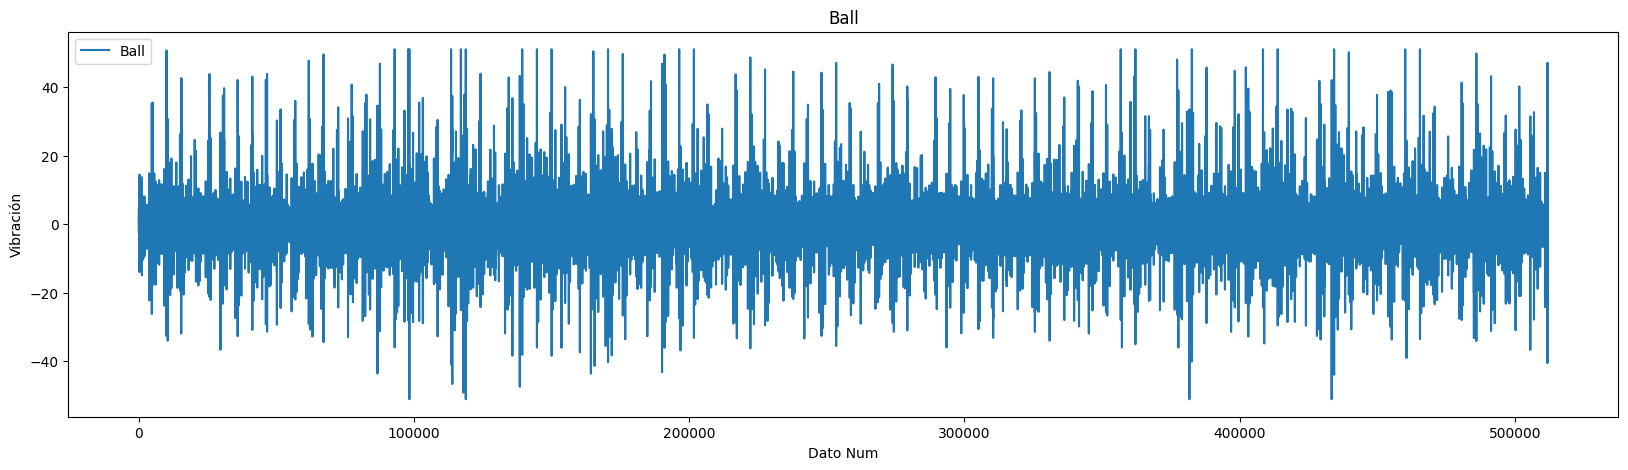

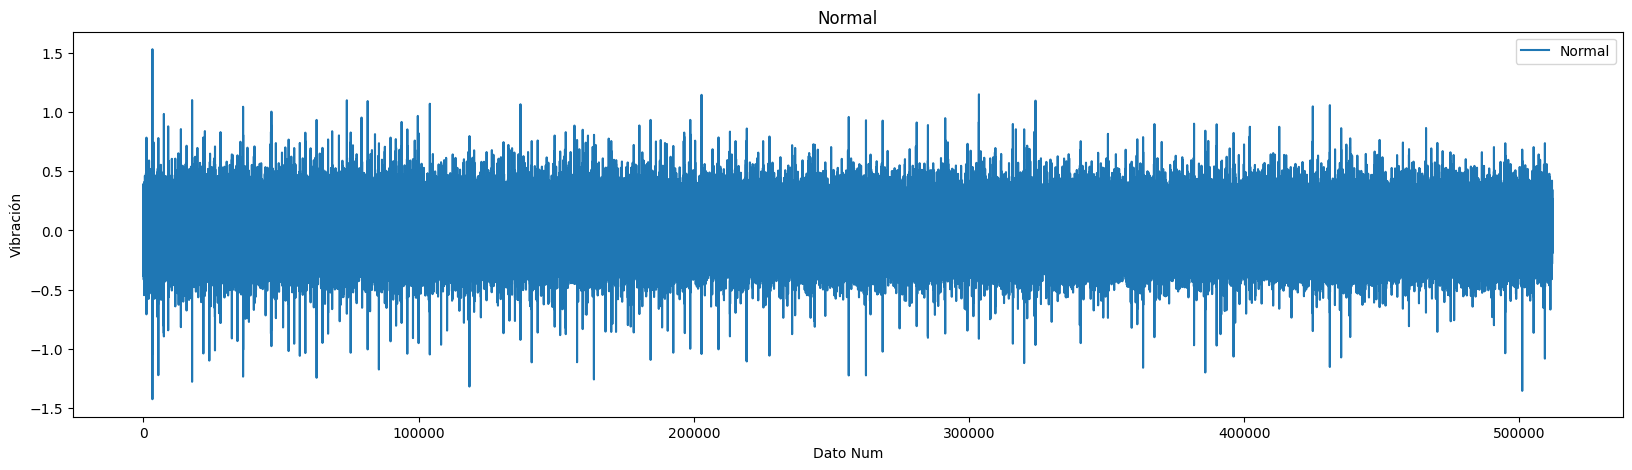

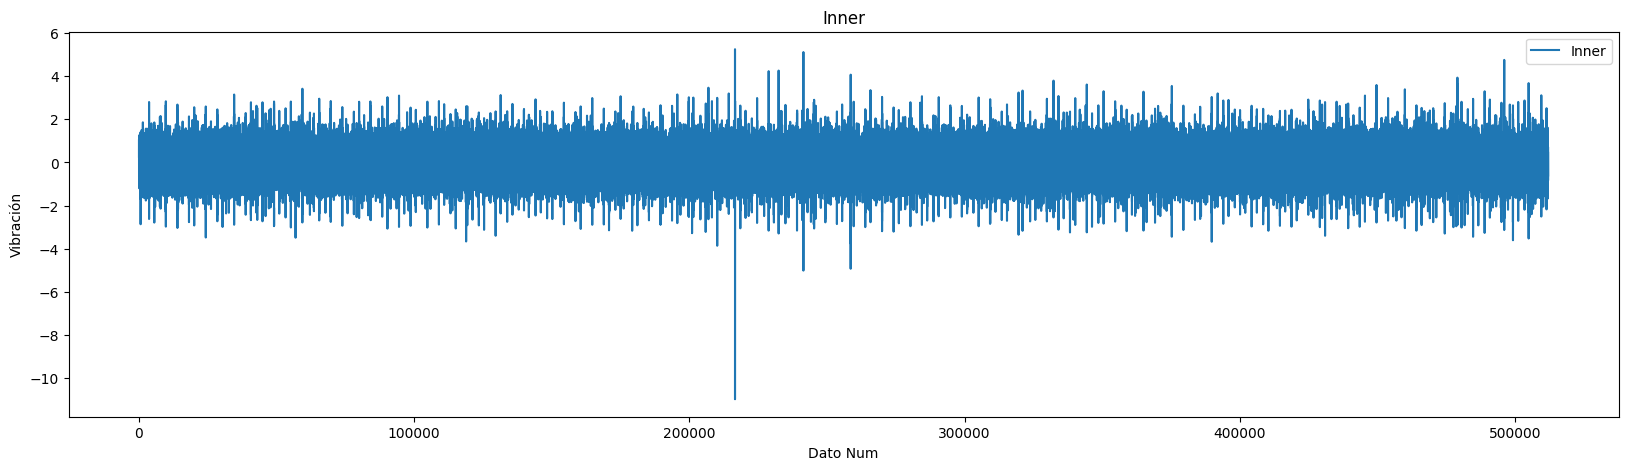

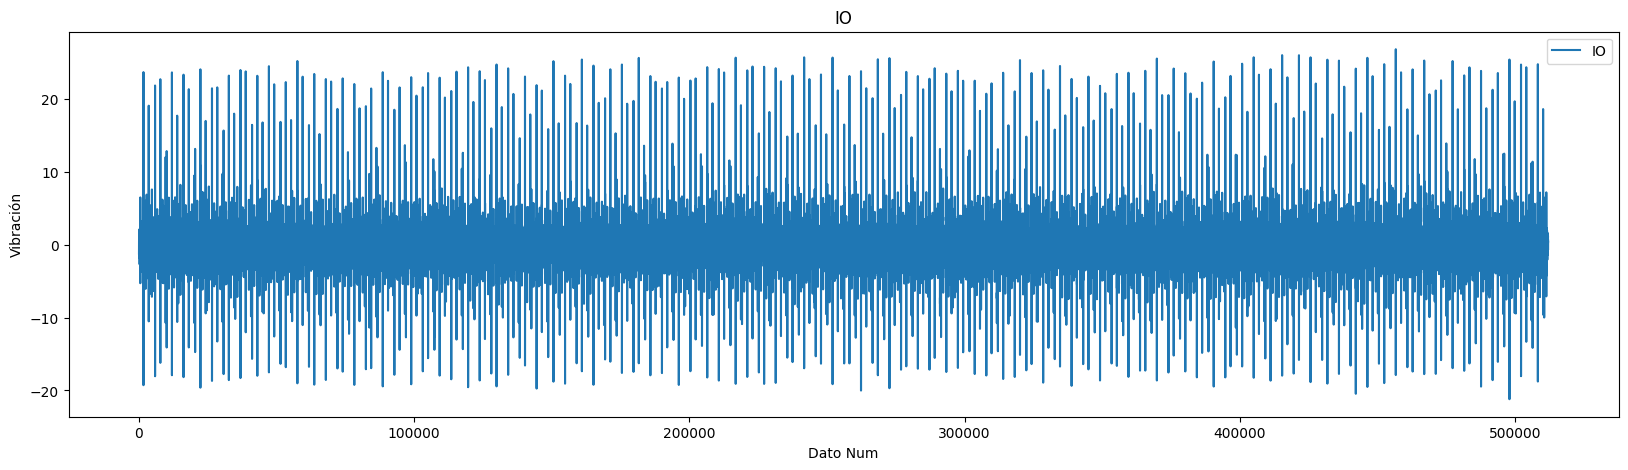

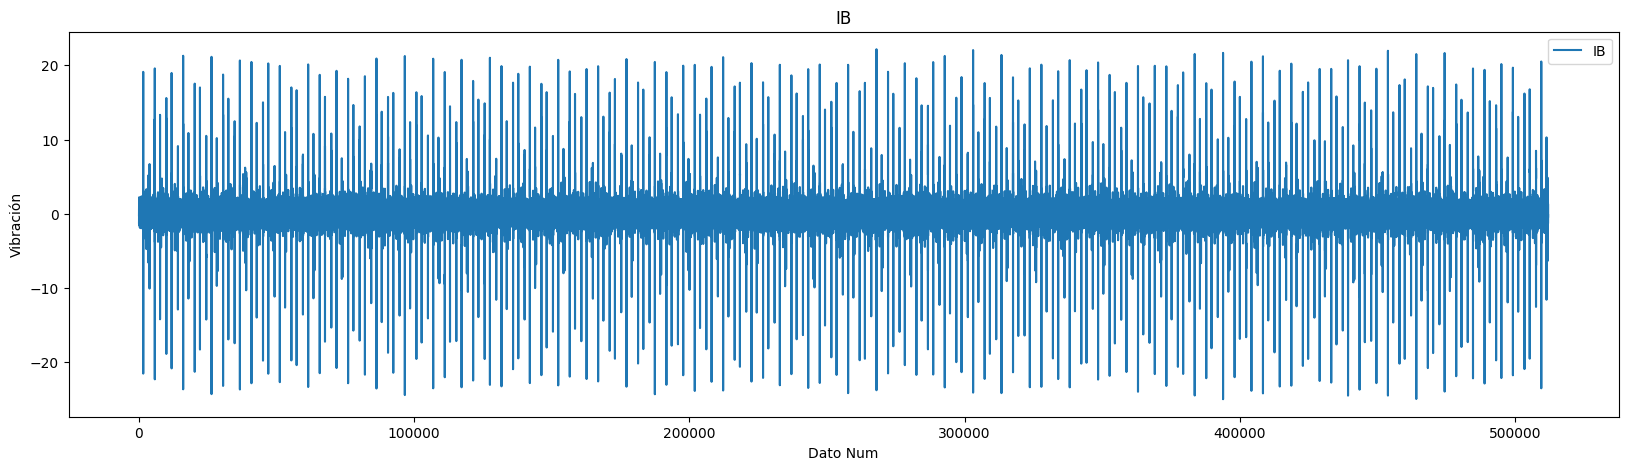

In [ ]:
for i in df_inicial.columns:
  graficar = df_inicial[i]
  plt.figure(figsize=(20,5))
  plt.plot(graficar)
  plt.legend([i])
  plt.xlabel("Dato Num")
  plt.ylabel("Vibración")
  plt.title(i)
  plt.show()

In [ ]:
def filter_std(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    filtered_data = np.where(np.abs(data - mean) > threshold * std, mean, data)
    return filtered_data

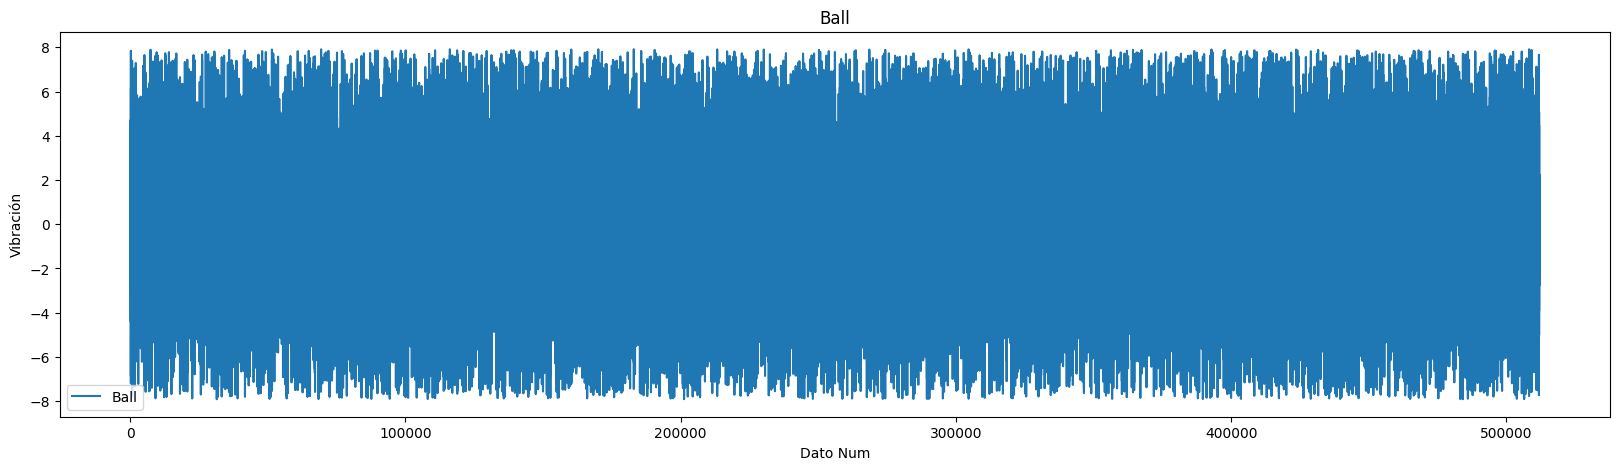

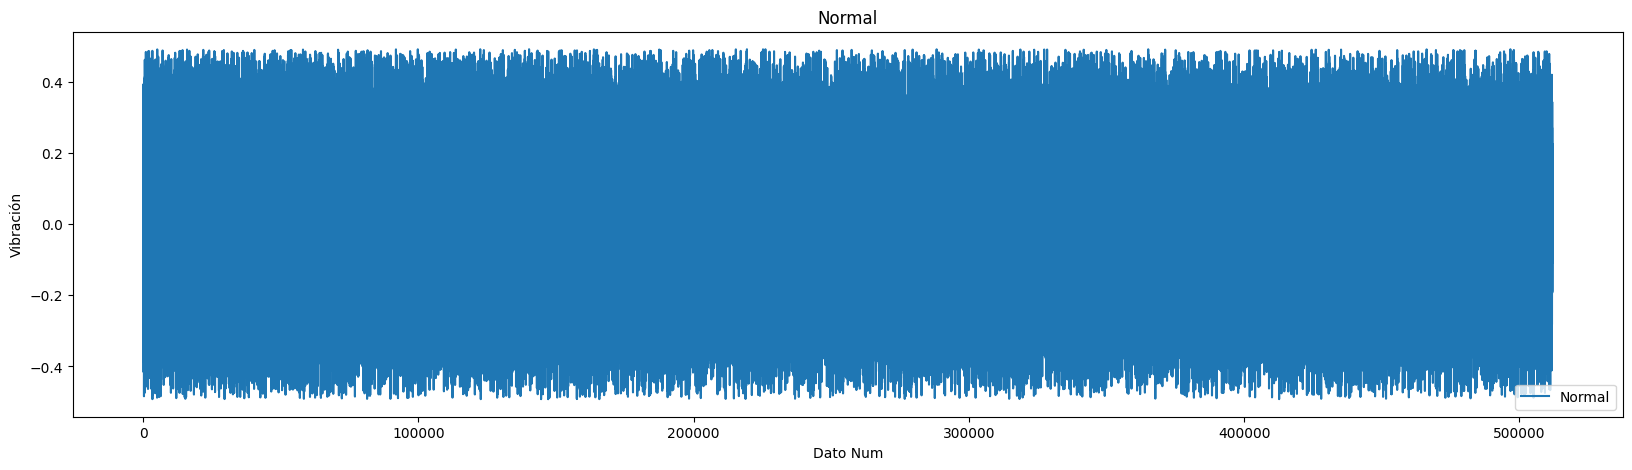

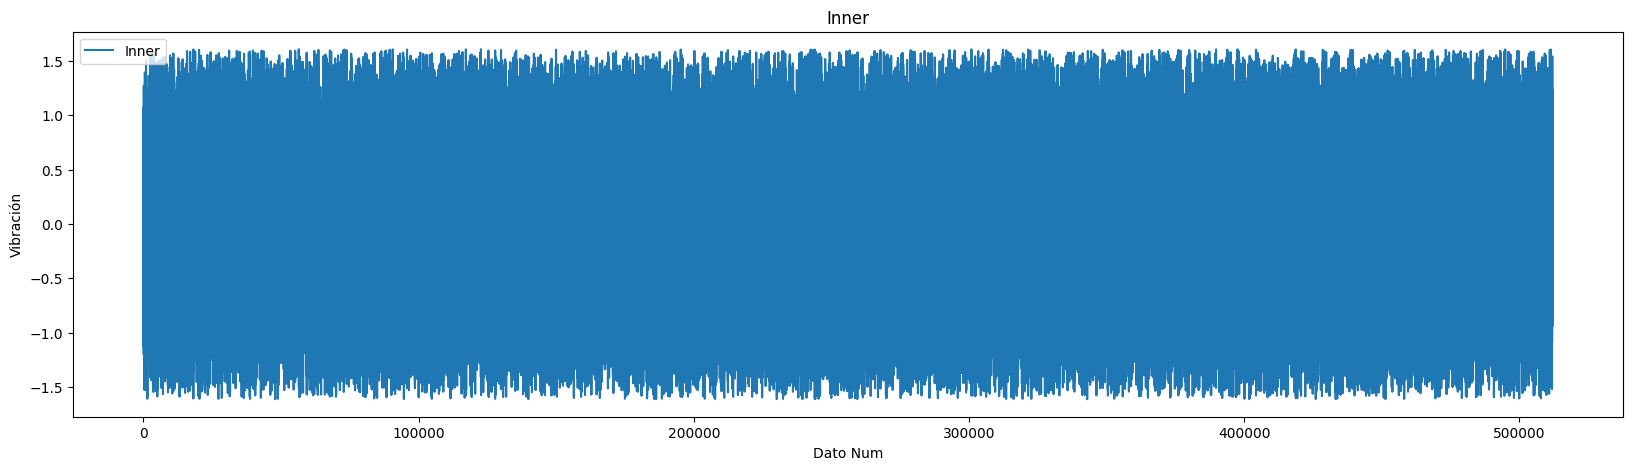

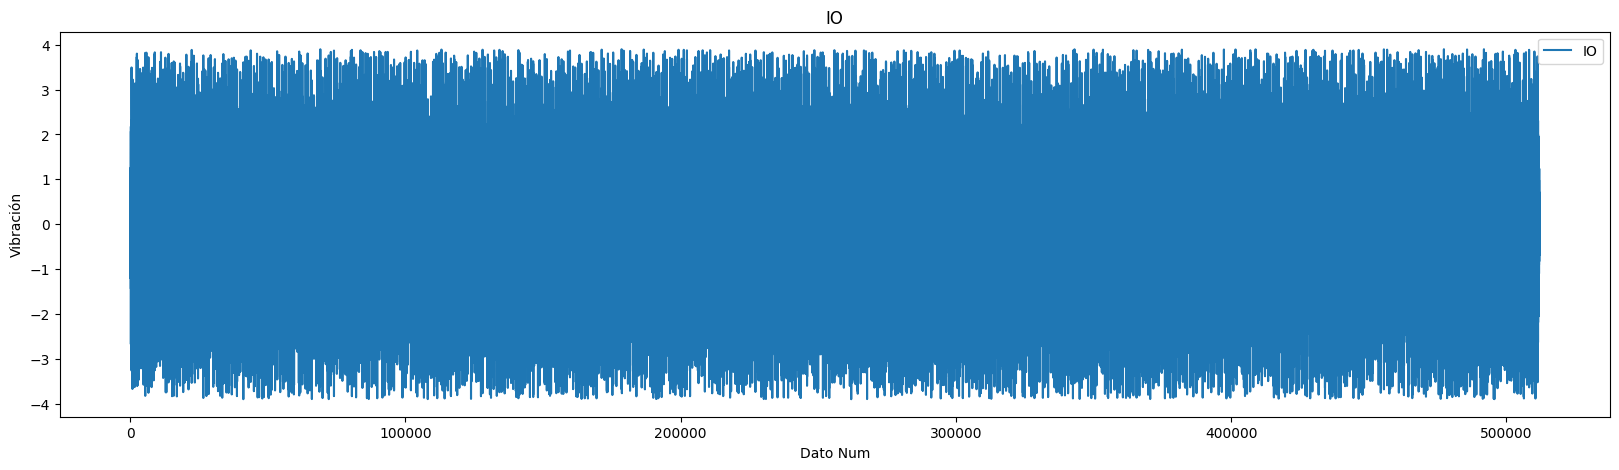

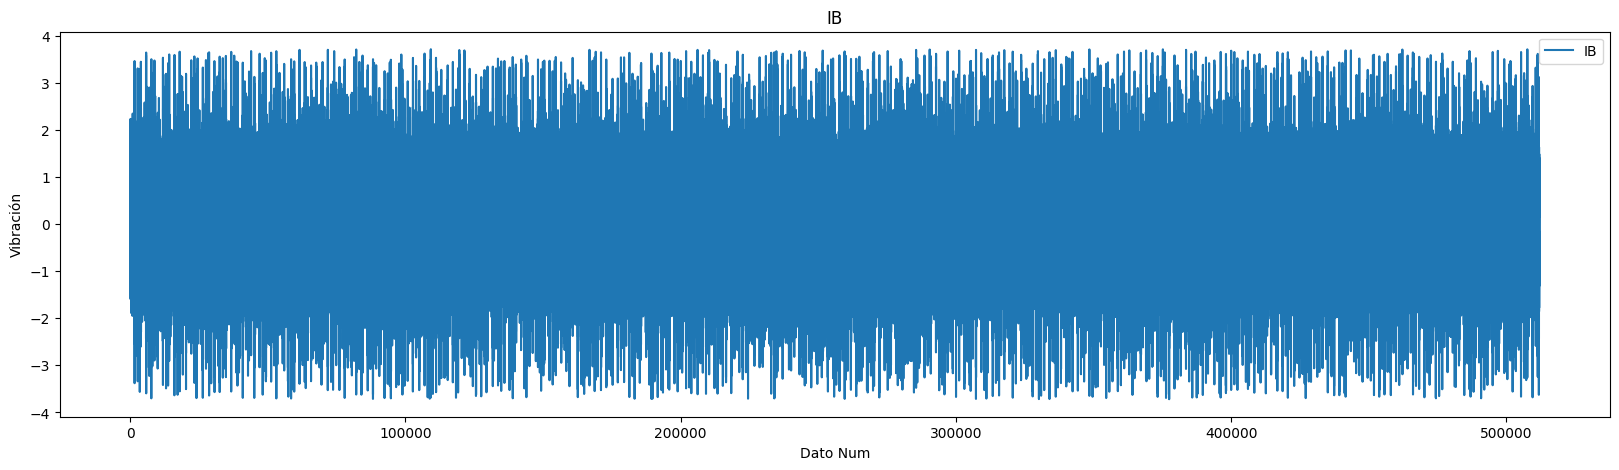

In [ ]:
# Eliminando los picos indeseados y volviendo a graficar
datos_filt={}
for key, values in datos.items():
    datos_filt[key] = filter_std(np.array(values)).tolist()
df_filt=pd.DataFrame(datos_filt)
for i in df_filt.columns:
  graficar = df_filt[i]
  plt.figure(figsize=(20,5))
  plt.plot(graficar)
  plt.legend([i])
  plt.xlabel("Dato Num")
  plt.ylabel("Vibración")
  plt.title(i)
  plt.show()

# ***Características a calcular por cada intervalo***
Maximum value

Minimum value

Mean value

Standard deviation (Unbiased std)

Root mean square value (RMS)

Skewness

Kurtosis

Crest factor = Max / Rms

Form factor = Rms / Mean

***Separando los datos en intervalos de 0,01 segundos, ya que así se tiene una cantidad significativa de datos (contamos con 51200 datos por segundo durante 10 segundos)***

In [ ]:
#Intervalo de tiempo en segundos
t = 0.01
# Número de datos por conjunto
num_per_set = int(512000*t/10)
datos_arr=np.concatenate([datos_ball,datos_normal,datos_inner,datos_io,datos_ib])
# Dividisión de datos en conjuntos
sets_data = [datos_arr[i:i + num_per_set] for i in range(0, len(datos_arr), num_per_set)]

# ***CARACTERISTICAS***

In [ ]:
def compute_skewness(x):

    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [ ]:
def compute_kurtosis(x):

    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
caracteristicas = []
for set in sets_data:
    caractersticasperset = [
        np.max(set),
        np.min(set),
        np.mean(set),
        np.std(set, ddof=1),
        np.sqrt(np.mean(set ** 2)),
        compute_skewness(set),
        compute_kurtosis(set),
        np.max(set) / np.sqrt(np.mean(set ** 2)),
        np.sqrt(np.mean(set ** 2)) / np.mean(set)
    ]
    caracteristicas.append(caractersticasperset)
    columnas = ['Max', 'Min', 'Mean', 'StdDev', 'RMS', 'Skewness', 'Kurtosis', 'Crest', 'Form']
    df= pd.DataFrame(caracteristicas, columns=columnas)

In [ ]:
# Asignando una nueva columna que simboliza las fallas
tipos_falla = np.repeat(['Ball', 'Normal', 'Inner', 'IO', 'IB'], 512000/num_per_set)
df['Falla']=tipos_falla

In [ ]:
df.head()
df.tail()

,Max,Min,Mean,StdDev,RMS,Skewness,Kurtosis,Crest,Form,Falla
4995,20.498621,-23.491633,-0.001244,2.607184,2.604637,-0.707970,32.612248,7.870049,-2092.967813,IB
4996,1.830469,-2.038964,-0.004542,0.673872,0.673229,-0.005817,-0.158508,2.718941,-148.212476,IB
4997,3.323025,-2.585857,-0.022294,0.785424,0.784974,-0.005540,0.994161,4.233296,-35.209951,IB
4998,10.287829,-11.571333,-0.004736,1.382168,1.380826,-0.943858,27.220967,7.450492,-291.576318,IB
4999,4.861895,-6.360290,0.004873,1.050475,1.049460,-0.468131,6.002278,4.632757,215.343402,IB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
df.columns

Index(['Max', 'Min', 'Mean', 'StdDev', 'RMS', 'Skewness', 'Kurtosis', 'Crest',
       'Form', 'Falla'],
      dtype='object')

## **GRAFICANDO LOS DATOS**

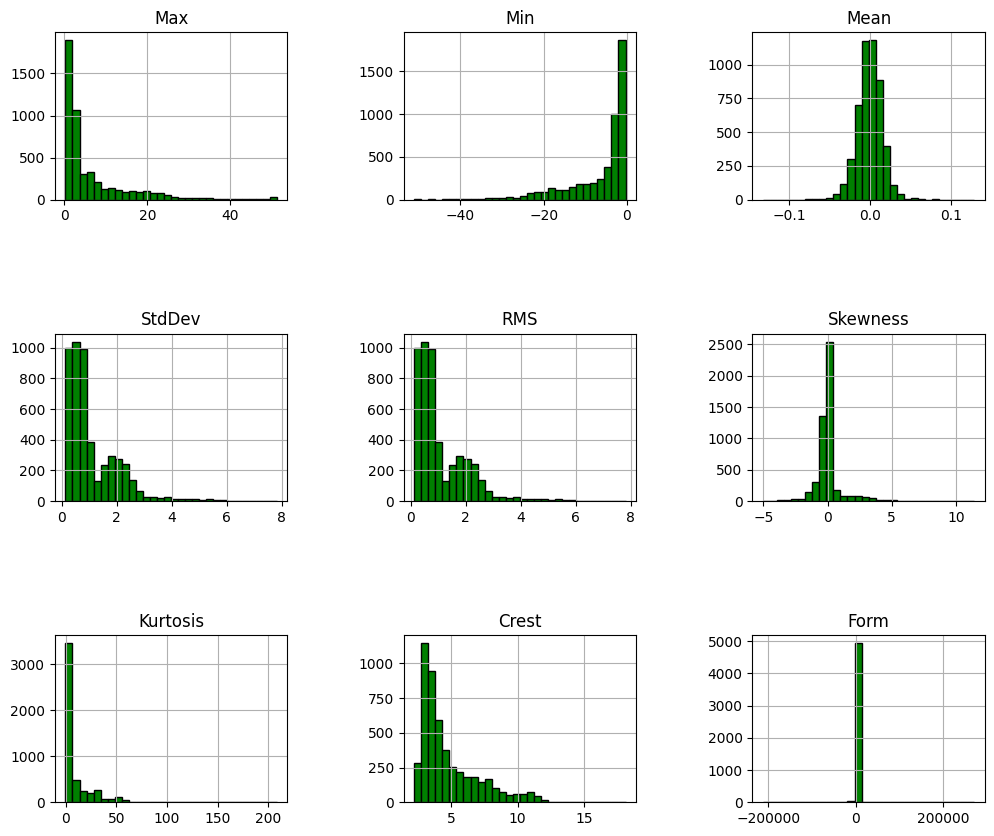

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black", color='green')
plt.subplots_adjust(hspace=0.8, wspace=0.5)

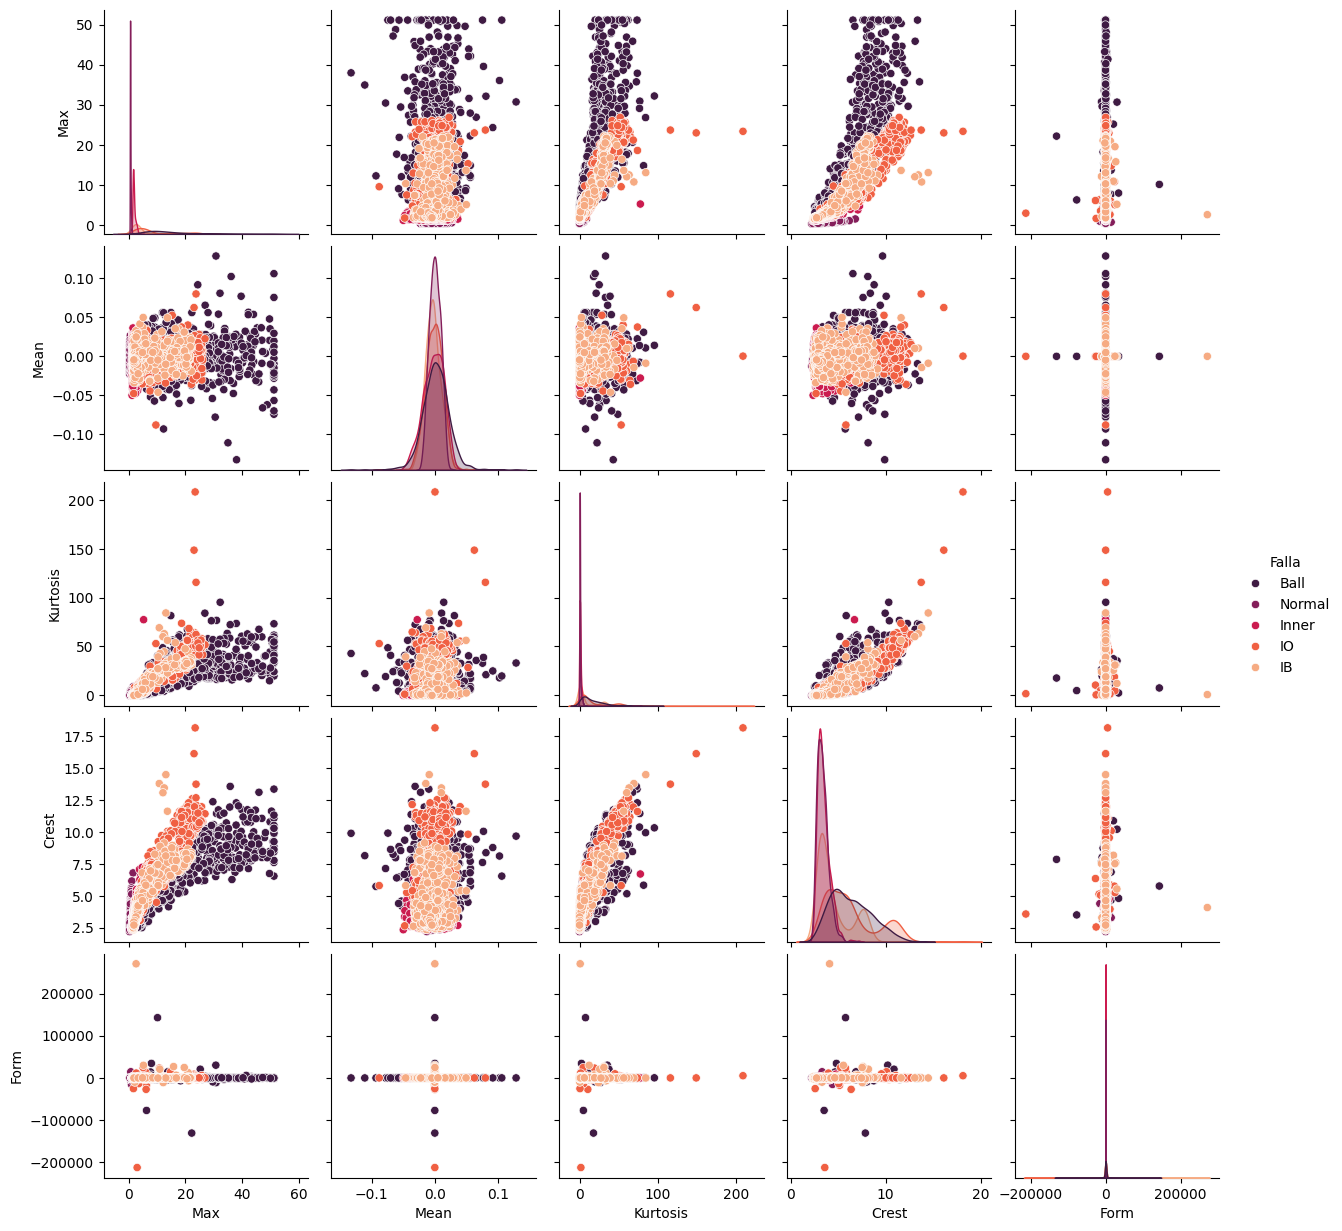

In [ ]:
# Eligiendo los datos que creemos tienen mayor relevancia en la falla
features_custom_subset = df[['Max', 'Mean', 'Kurtosis', 'Crest','Form', 'Falla']]
defect_subset = features_custom_subset
rcParams['figure.figsize'] = 8, 6
sns.pairplot(defect_subset,hue='Falla',palette='rocket')

In [ ]:
# Separando en datos para entrenar y para probar
train_data, test_data = train_test_split(df, test_size = 0.2, stratify = df['Falla'], random_state = 1234)
print( train_data['Falla'].value_counts(), "\n\n", test_data['Falla'].value_counts())

Falla
IO        800
IB        800
Normal    800
Inner     800
Ball      800
Name: count, dtype: int64 

 Falla
Ball      200
Normal    200
IO        200
IB        200
Inner     200
Name: count, dtype: int64


In [ ]:
# Escalando los datos para entrenar
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1]) # La ultima columna, referente a falla no se considera
pd.DataFrame(train_data_scaled).describe() #Para verificar el escalado

,0,1,2,3,4,5,6,7,8
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,4.618528e-17,-5.684342e-17,1.776357e-18,-2.007283e-16,3.907985e-17,7.105427e-18,4.840572e-17,1.021405e-16,8.881784e-19
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.221635e-01,-5.779748e+00,-8.506765e+00,-9.681692e-01,-9.680806e-01,-4.848548e+00,-6.303469e-01,-1.163690e+00,-3.260185e+01
25%,-5.879075e-01,-4.012530e-01,-5.787949e-01,-5.942444e-01,-5.943403e-01,-2.768086e-01,-5.818531e-01,-7.139052e-01,-1.684677e-02
50%,-4.600596e-01,4.727344e-01,-1.789868e-03,-3.745175e-01,-3.745303e-01,-6.151257e-02,-4.877610e-01,-4.089148e-01,-5.889118e-03
75%,1.790861e-01,6.448450e-01,6.171731e-01,5.597003e-01,5.595864e-01,1.092015e-01,9.304034e-02,4.654711e-01,9.580609e-03
max,4.989643e+00,7.995793e-01,8.409909e+00,6.862175e+00,6.863071e+00,1.057565e+01,9.866859e+00,5.124692e+00,4.151406e+01


In [ ]:
# Escalando los datos de prueba
test_data_scaled = scaler.fit_transform(test_data.iloc[:,:-1]) # La ultima columna, referente a falla no se considera
#Preguntar si es mejor el escalado manual
pd.DataFrame(train_data_scaled).describe() #Para verificar el escalado

,0,1,2,3,4,5,6,7,8
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,4.618528e-17,-5.684342e-17,1.776357e-18,-2.007283e-16,3.907985e-17,7.105427e-18,4.840572e-17,1.021405e-16,8.881784e-19
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.221635e-01,-5.779748e+00,-8.506765e+00,-9.681692e-01,-9.680806e-01,-4.848548e+00,-6.303469e-01,-1.163690e+00,-3.260185e+01
25%,-5.879075e-01,-4.012530e-01,-5.787949e-01,-5.942444e-01,-5.943403e-01,-2.768086e-01,-5.818531e-01,-7.139052e-01,-1.684677e-02
50%,-4.600596e-01,4.727344e-01,-1.789868e-03,-3.745175e-01,-3.745303e-01,-6.151257e-02,-4.877610e-01,-4.089148e-01,-5.889118e-03
75%,1.790861e-01,6.448450e-01,6.171731e-01,5.597003e-01,5.595864e-01,1.092015e-01,9.304034e-02,4.654711e-01,9.580609e-03
max,4.989643e+00,7.995793e-01,8.409909e+00,6.862175e+00,6.863071e+00,1.057565e+01,9.866859e+00,5.124692e+00,4.151406e+01


# ***RANDOM FOREST CLASSIFIER***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
rf = RandomForestClassifier(n_estimators= 300, max_features = "sqrt", n_jobs = -1, random_state = 38)

# Entrenamiento del modelo
rf.fit(train_data_scaled, train_data['Falla'])

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=38)

**Evaluación del modelo**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [ ]:
# Entrenando la predicción de datos
train_predictions = rf.predict(train_data_scaled)
# Probando la predicción de datos
test_predictions = rf.predict(test_data_scaled)
# Hallando la probabilidad de predicción
y_score = rf.predict_proba(test_data_scaled)

array([[0.93333333, 0.01      , 0.05666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.99333333, 0.00333333, 0.00333333, 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.00333333, 0.08      , 0.91666667, 0.        ],
       [0.        , 0.00666667, 0.03333333, 0.96      , 0.        ]])

In [ ]:
# Graficando las matrices de confusión
# Matriz  de confusión para datos de entrenamiento
train_confu_matrix = confusion_matrix(train_data['Falla'], train_predictions)

# Matriz  de confusión para datos de prueba
test_confu_matrix = confusion_matrix(test_data['Falla'], test_predictions)

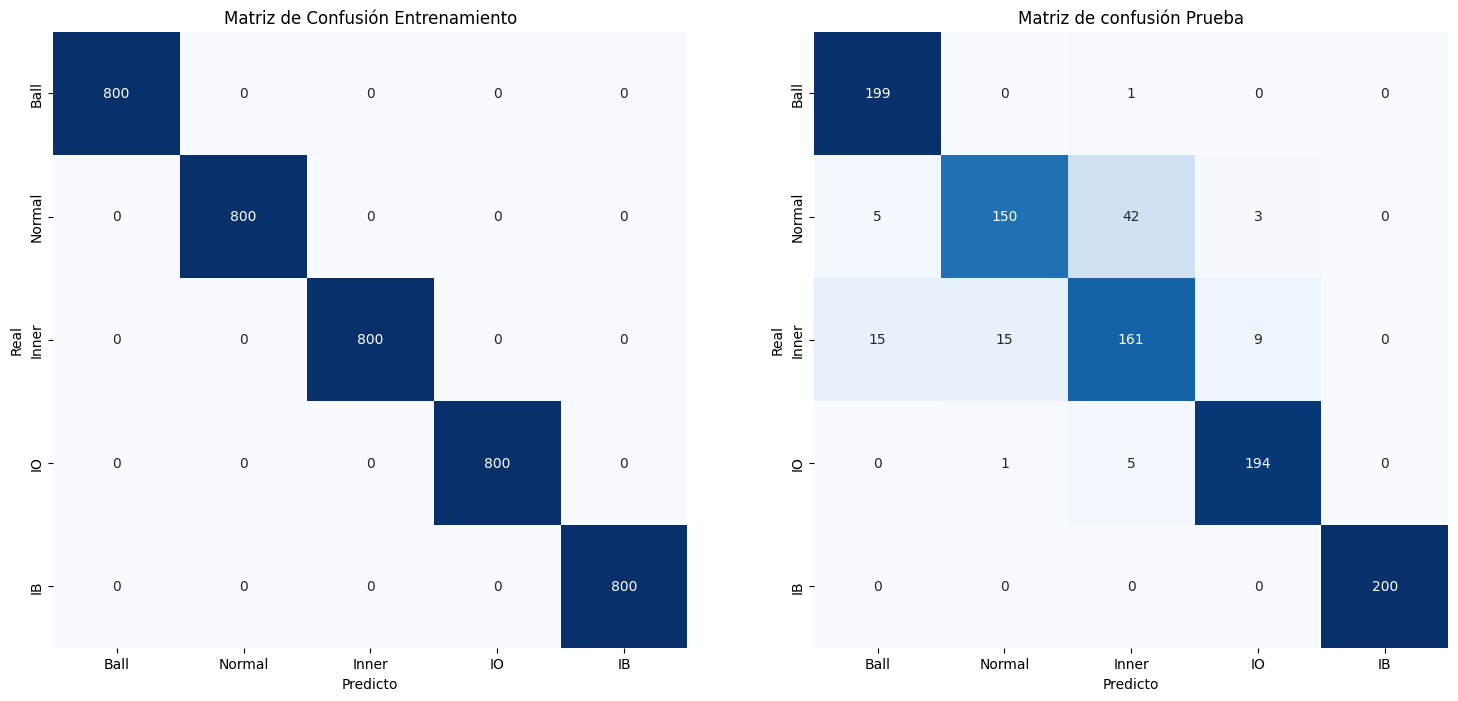

In [ ]:
Clasif_Falla = df.Falla.unique()

plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "g",
xticklabels=Clasif_Falla, yticklabels=Clasif_Falla, cmap = "Blues", cbar = False)
plt.title('Matriz de Confusión Entrenamiento')
plt.xlabel('Predicto')
plt.ylabel('Real')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True, fmt="g",
xticklabels=Clasif_Falla, yticklabels=Clasif_Falla, cmap = "Blues", cbar = False)
plt.title('Matriz de confusión Prueba')
plt.xlabel('Predicto')
plt.ylabel('Real')

plt.show()

In [ ]:
print("Accuracy:", accuracy_score(test_data['Falla'], test_predictions))

Accuracy: 0.904


# ***SVM (Support Vector Machine)***

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_data_scaled, train_data['Falla'])

SVC()

In [ ]:
#Analogamente al modelo anterior, obteniendo las predicciones
train_predictions2 = svc_model.predict(train_data_scaled)
test_predictions2 = svc_model.predict(test_data_scaled)

In [ ]:
train_confu_matrix = confusion_matrix(train_data['Falla'], train_predictions2)
test_confu_matrix = confusion_matrix(test_data['Falla'], test_predictions2)

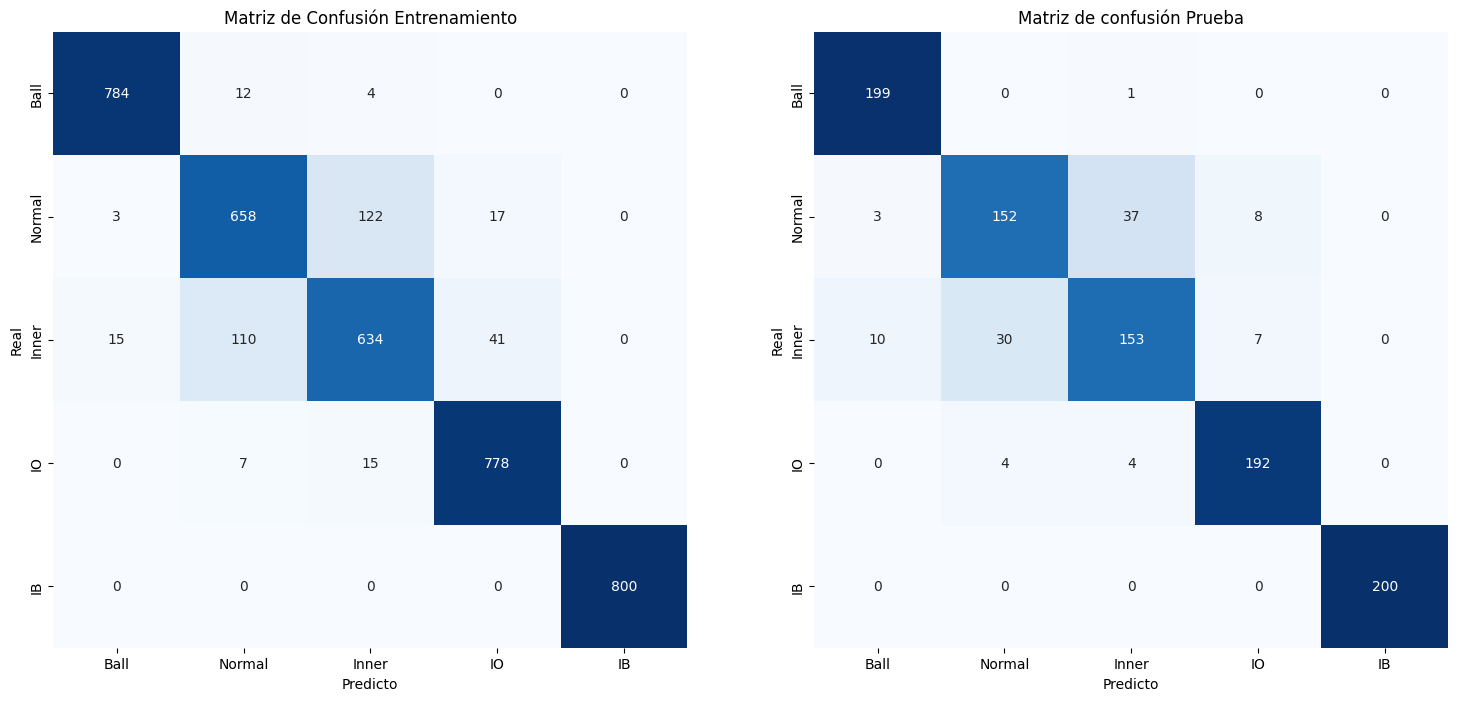

In [ ]:
Clasif_Falla = df.Falla.unique()

plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "g",
xticklabels=Clasif_Falla, yticklabels=Clasif_Falla, cmap = "Blues", cbar = False)
plt.title('Matriz de Confusión Entrenamiento')
plt.xlabel('Predicto')
plt.ylabel('Real')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True, fmt="g",
xticklabels=Clasif_Falla, yticklabels=Clasif_Falla, cmap = "Blues", cbar = False)
plt.title('Matriz de confusión Prueba')
plt.xlabel('Predicto')
plt.ylabel('Real')

plt.show()

In [ ]:
print("Accuracy:", accuracy_score(test_data['Falla'], test_predictions2))

Accuracy: 0.896
